In [ ]:
import numpy as np
import matplotlib.pyplot

In [ ]:
def cal_pop_fitness(equation_inputs, pop):
    """Calculates the fitness value of each solution in the current population.

    The fitness function calculates the sum of the products between each input and its corresponding weight.

    Args:
        equation_inputs (list): The inputs to the equation.
        pop (np.ndarray): The current population.

    Returns:
        np.ndarray: The fitness of each individual in the population.
    """
    fitness = np.sum(pop*equation_inputs, axis=1)
    return fitness

In [ ]:
def select_mating_pool(pop, fitness, num_parents):
    """Selects the best individuals in the current generation as parents for producing the offspring of the next generation.

    Args:
        pop (np.ndarray): The current population.
        fitness (np.ndarray): The fitness of each individual in the population.
        num_parents (int): The number of parents to select.

    Returns:
        np.ndarray: The selected parents.
    """
    # Shift fitness values to be non-negative
    fitness = fitness - fitness.min()  # Ensures all fitness values are non-negative

    # Select parents using random choice weighted by fitness
    parents_idx = np.random.choice(pop.shape[0], size=num_parents, replace=False, p=fitness / fitness.sum())
    return pop[parents_idx]

In [ ]:
def crossover(parents, offspring_size):
    """Performs crossover between two parents to create offspring.

    Args:
        parents (np.ndarray): The selected parents for mating.
        offspring_size (tuple): The size of the offspring array.

    Returns:
        np.ndarray: The offspring generated after crossover.
    """
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [ ]:
def mutation(offspring_crossover, num_mutations=1):
    """Introduces mutations in the offspring to maintain diversity.

    Args:
        offspring_crossover (np.ndarray): The offspring generated after crossover.
        num_mutations (int, optional): The number of mutations to introduce. Defaults to 1.

    Returns:
        np.ndarray: The offspring with mutations introduced.
    """
    mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the gene.
            random_value = np.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = np.clip(offspring_crossover[idx, gene_idx] + random_value, -4.0, 4.0) # clip untuk memastikan ada di range
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover

In [ ]:
"""
Genetic Algorithm to maximize the equation:
y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6
where (x1, x2, x3, x4, x5, x6) = (3, -1, 4.5, 6, -10, -5.7)

This script uses a genetic algorithm to find the best values for the six weights (w1 to w6) that maximize the equation.
"""

# Inputs to the equation
equation_inputs = [3, -1, 4.5, 6, -10, -5.7]

# Number of weights to be optimized
num_weights = len(equation_inputs)

"""
Genetic Algorithm Parameters:
- Mating pool size
- Population size
"""
sol_per_pop = 30  # Number of solutions (chromosomes) per population
num_parents_mating = 4  # Number of parents selected for mating

# Defining the population size
pop_size = (sol_per_pop, num_weights)  # The population will have sol_per_pop chromosomes where each chromosome has num_weights genes.

# Creating the initial population
new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

[[ 0.34006664 -2.60398141  3.3458725   1.33224689 -2.07966111  1.54331039]
 [-2.80070938 -3.73031213 -2.95336878 -3.28495652 -2.89537219  3.72117988]
 [ 3.28633267 -2.04010505  1.51622072  3.75396185  2.50452963  1.91233183]
 [ 1.59140016 -1.65110805 -3.42062866  0.3826106   2.3917281   3.04502161]
 [ 2.7222766  -2.34145526 -3.82445502  2.21943304  1.25910383  1.63614408]
 [ 3.06642349 -3.64427397  3.5079059  -3.16056456  1.23248065  3.37581513]
 [-3.85505998  0.91649014  0.55853223 -1.70241337  3.12178305 -0.9287694 ]
 [-1.18210828  1.93288588  3.28475143  2.09243756  3.30594255 -2.63779059]
 [-3.96987195 -2.0088003   2.09102945  0.34723602  1.80681748 -3.30964079]
 [-0.34187855  0.78573898  1.03677567  0.64389993 -0.05546861  3.41622698]
 [-2.63699799  1.58209471  0.96933335 -1.47699112  2.62365761 -0.91998443]
 [ 2.7330171  -3.47907941 -3.2928277   2.05203572  3.19109429  1.05656405]
 [ 3.44984259  1.13168024 -2.84533694 -2.95029833 -2.42761007 -2.12343827]
 [-2.05474697 -1.23725349

In [ ]:
best_outputs = []
num_generations = 100

for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(np.max(np.sum(new_population * equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", np.max(np.sum(new_population * equation_inputs, axis=1)))

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=3)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

Generation :  0
Fitness
[ 38.67383077 -29.92871804   5.30027967 -47.94576106 -15.30222386
 -21.90121907 -46.1066002    3.83277693   2.38901077 -12.20029219
 -34.98570013 -28.76073767  15.09174008 -18.30729436  49.03841076
 -35.8088668  -38.38716019  -7.27718714  -8.03481869  20.89526735
  36.26623057  18.98512863 -45.04331524  12.73593528  23.39832078
  18.82432159  51.82630907  28.47905865  33.56040722 -51.10971896]
Best result :  51.82630906672427
Parents
[[-3.96987195 -2.0088003   2.09102945  0.34723602  1.80681748 -3.30964079]
 [ 2.36388844  1.92677355  3.29960544 -2.85833142 -0.35868466 -3.86475163]
 [ 2.76751597 -3.08701219 -0.66194677 -1.04764501 -2.74918621 -1.16656823]
 [-2.83764036 -0.33500856  1.76897959  3.83366242  2.58601031 -3.87030905]]
Crossover
[[-3.96987195 -2.0088003   2.09102945 -2.85833142 -0.35868466 -3.86475163]
 [ 2.36388844  1.92677355  3.29960544 -1.04764501 -2.74918621 -1.16656823]
 [ 2.76751597 -3.08701219 -0.66194677  3.83366242  2.58601031 -3.87030905]
 [

<ipython-input-14-6eccd602c47d>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, gene_idx] = np.clip(offspring_crossover[idx, gene_idx] + random_value, -4.0, 4.0)


Streaming output truncated to the last 5000 lines.
 [ 2.36388844  0.40352152  3.29960544  3.73724995 -2.74918621 -4.        ]
 [ 2.36388844 -0.02361228  3.29960544  3.6590907  -2.74918621 -4.        ]
 [ 2.36388844  1.6685985   3.29960544  3.22073333 -2.74918621 -4.        ]
 [ 2.36388844  0.44283893  3.29960544  4.         -2.74918621 -4.        ]
 [ 2.36388844  0.40352152  3.29960544  3.73724995 -2.74918621 -4.        ]
 [ 2.36388844 -0.02361228  3.29960544  3.6590907  -2.74918621 -4.        ]
 [ 2.36388844  1.6685985   3.29960544  3.22073333 -2.74918621 -4.        ]
 [ 2.36388844  0.44283893  3.29960544  4.         -2.74918621 -4.        ]
 [ 2.36388844  0.40352152  3.29960544  3.73724995 -2.74918621 -4.        ]
 [ 2.36388844 -0.02361228  3.29960544  3.6590907  -2.74918621 -4.        ]
 [ 2.36388844  1.6685985   3.29960544  3.22073333 -2.74918621 -4.        ]
 [ 2.36388844  0.44283893  3.29960544  4.         -2.74918621 -4.        ]
 [ 2.36388844  0.40352152  3.29960544  3.73724995

In [ ]:
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

Best solution :  [[[ 2.36388844 -2.06113808  3.29960544  4.         -2.74918621
   -4.        ]]]
Best solution fitness :  [98.29288994]


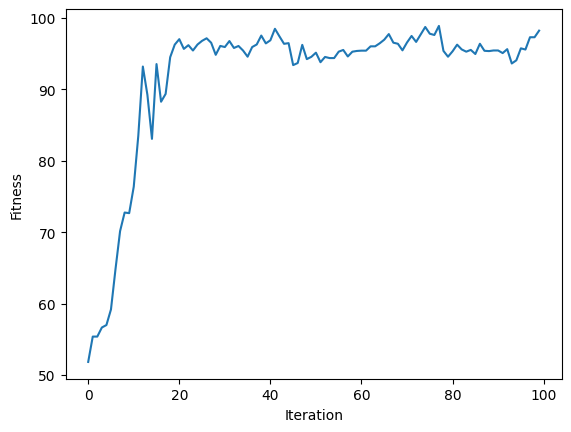

In [ ]:
# Plotting the best outputs over generations
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()